In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Create a simple synthetic dataset
np.random.seed(42)  # Ensures reproducibility
data = {
    'Income': np.random.randint(30000, 120000, 1000),
    'Debt_to_Income': np.random.uniform(0.1, 0.6, 1000),
    'Credit_Score': np.random.randint(300, 850, 1000),
    'Employment_Status': np.random.choice(['Full-time', 'Part-time', 'Self-employed'], 1000),
    'Loan_Amount_Requested': np.random.randint(50000, 500000, 1000),
    'Existing_Loans': np.random.randint(0, 5, 1000),
    'Eligible': np.random.choice([0, 1], 1000)  # 0: Not eligible, 1: Eligible
}

df = pd.DataFrame(data)


In [3]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Employment_Status'], drop_first=True)


In [4]:
# Define features (X) and target (y)
X = df.drop('Eligible', axis=1)  # Features
y = df['Eligible']  # Target (Eligibility)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the Decision Tree model with a maximum depth of 5 (you can adjust this)
model_dt = DecisionTreeClassifier(max_depth=5)

# Train the model
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [6]:
# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model's performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.42      0.41        84
           1       0.56      0.54      0.55       116

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.49      0.49       200



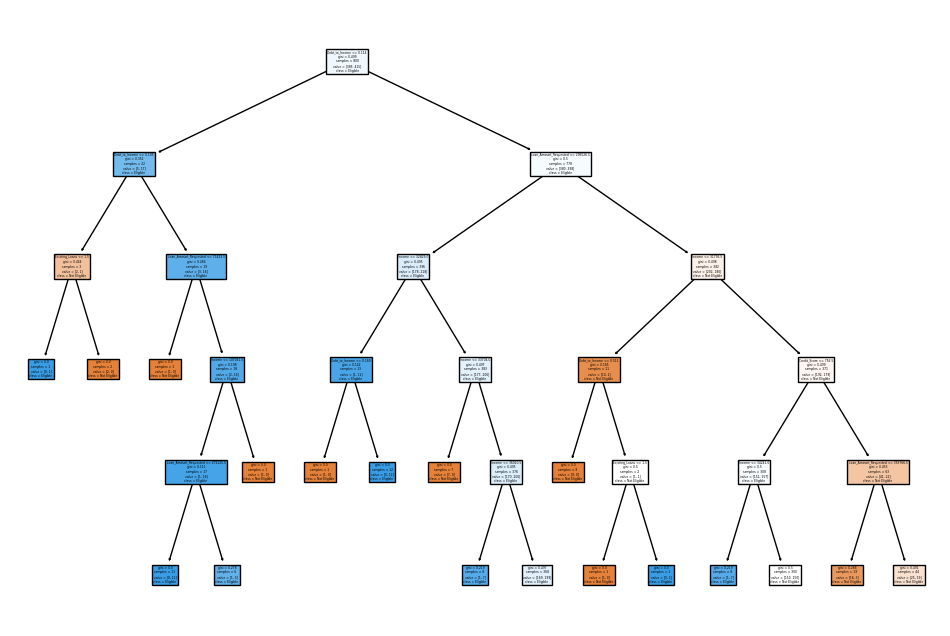

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model_dt, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'], filled=True)
plt.show()


In [8]:
# Step 7: Function to check loan eligibility based on input values
def check_eligibility(income, debt_to_income, credit_score, employment_status, loan_amount, existing_loans):
    # Prepare the input data for prediction
    input_data = {
        'Income': [income],
        'Debt_to_Income': [debt_to_income],
        'Credit_Score': [credit_score],
        'Loan_Amount_Requested': [loan_amount],
        'Existing_Loans': [existing_loans]
    }

    # One-hot encoding for employment status
    if employment_status == 'Full-time':
        input_data['Employment_Status_Part-time'] = [0]
        input_data['Employment_Status_Self-employed'] = [0]
    elif employment_status == 'Part-time':
        input_data['Employment_Status_Part-time'] = [1]
        input_data['Employment_Status_Self-employed'] = [0]
    elif employment_status == 'Self-employed':
        input_data['Employment_Status_Part-time'] = [0]
        input_data['Employment_Status_Self-employed'] = [1]
    
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Make prediction
    prediction = model_dt.predict(input_df)
    
    # Output the result
    if prediction == 1:
        return "Eligible for Loan"
    else:
        return "Not Eligible for Loan"


In [9]:
# Example: Checking loan eligibility for a user
income = 70000
debt_to_income = 0.3
credit_score = 680
employment_status = 'Full-time'
loan_amount = 150000
existing_loans = 1

result = check_eligibility(income, debt_to_income, credit_score, employment_status, loan_amount, existing_loans)
print("Eligibility Result:", result)


Eligibility Result: Eligible for Loan
